# Support Vector Machine (SVM) Multiclass Classification

In [135]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [136]:
# Test & Train split 
filename = 'Data/disease.tsv'
df = pd.read_table(filename, sep='\t') 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
df 

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.0150,0.12000,0.082,0.14600,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0300,0.14300,0.133,0.10800,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0240,0.10200,0.131,0.07800,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.0170,0.07700,0.090,0.08500,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0260,0.13900,0.090,0.15300,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00232,0.0201,0.11329,0.096,0.11776,3
7196,0.27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00150,0.0201,0.09000,0.082,0.11000,3
7197,0.26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00100,0.0201,0.08000,0.075,0.10700,3
7198,0.95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00160,0.0201,0.09800,0.091,0.10800,3


In [137]:
# Test & Train split 
filename = 'Data/disease.tsv'
df = pd.read_table(filename, sep='\t') 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
df 

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.0150,0.12000,0.082,0.14600,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0300,0.14300,0.133,0.10800,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0240,0.10200,0.131,0.07800,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.0170,0.07700,0.090,0.08500,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0260,0.13900,0.090,0.15300,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00232,0.0201,0.11329,0.096,0.11776,3
7196,0.27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00150,0.0201,0.09000,0.082,0.11000,3
7197,0.26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00100,0.0201,0.08000,0.075,0.10700,3
7198,0.95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00160,0.0201,0.09800,0.091,0.10800,3


In [138]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Class,
1,130
2,298
3,5332


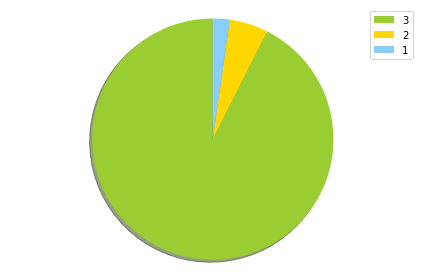

In [139]:
# Visualizing Outcome Distribution 
temp = train["Class"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [140]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Class'],axis=1))
Y_train_label = train.Class.values
X_test = pd.DataFrame(test.drop(['Class'],axis=1))
Y_test_label = test.Class.values

In [141]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (5760, 21)
Dimension of Test set (1440, 21) 



In [142]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [143]:
# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)
# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 21


In [144]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [145]:
names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
# Performing CV to tune parameters for best SVM fit 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [147]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9777777777777776 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [148]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[  32    1    3]
 [   0   54   16]
 [   8    4 1322]]


              precision    recall  f1-score   support

           1       0.80      0.89      0.84        36
           2       0.92      0.77      0.84        70
           3       0.99      0.99      0.99      1334

    accuracy                           0.98      1440
   macro avg       0.90      0.88      0.89      1440
weighted avg       0.98      0.98      0.98      1440

Training set score for SVM: 0.978819
Testing  set score for SVM: 0.977778


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>